In [3]:
# pip install tensorflow
# Data analysis and visualization
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


SyntaxError: invalid syntax (1123508107.py, line 1)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [11]:
(X_train , y_train), (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(
 path = 'boston_housing_npz',
 test_split = 0.2,
 seed = 42
 )

In [12]:
# Converting Data to DataFrame
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
# Preview the training data
X_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
5,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
6,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
7,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
8,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
9,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33


In [13]:
# View summary of datasets
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [14]:

# distribution of numerical feature values across the samples
X_train_df.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
# Create column transformer
ct = make_column_transformer(
 (MinMaxScaler(), [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12])
)
# Normalization and data type change
X_train = ct.fit_transform(X_train).astype('float32')
X_test = ct.transform(X_test).astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
# Distribution of X_train feature values after normalization
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.042528,0.115681,0.394210,0.348815,0.521905,0.681970,0.241618,0.376560,0.423589,0.625737,0.897607,0.302511
std,0.102650,0.242696,0.253866,0.239522,0.138678,0.288719,0.194973,0.379829,0.323827,0.229502,0.232131,0.202740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.137860,0.444098,0.438466,0.087361,0.130435,0.179389,0.510638,0.944992,0.143481
50%,0.002881,0.000000,0.338343,0.314815,0.507569,0.768280,0.184767,0.173913,0.272901,0.691489,0.985892,0.267406
75%,0.041717,0.125000,0.646628,0.491770,0.586223,0.942585,0.362255,1.000000,0.914122,0.808511,0.997252,0.422954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Reserve data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((363, 12), (41, 12), (363,), (41,))

In [17]:

# Set random seed
tf.random.set_seed(42)
# Building the model
model = tf.keras.Sequential([
 tf.keras.layers.Dense(units=10, activation='relu', input_shape=(X_train.shape[1],), name='Dense_1'),
 tf.keras.layers.Dense(units=100, activation='relu', name='Dense_2'),
 tf.keras.layers.Dense(units=1, name='Prediction')
])
# Compiling the model
model.compile(
 loss = tf.keras.losses.mean_squared_error,
 optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
 metrics = ['mse']
)
# Training the model
history = model.fit(
 X_train,
 y_train,
 batch_size=32,
 epochs=50,
 validation_data=(X_val, y_val)
)

Epoch 1/50
12/12 [==============================] - 1s 32ms/step - loss: 305.5426 - mse: 305.5426 - val_loss: 166.8935 - val_mse: 166.8935
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 107.6990 - mse: 107.6990 - val_loss: 111.3118 - val_mse: 111.3118
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 73.9356 - mse: 73.9356 - val_loss: 80.5548 - val_mse: 80.5548
Epoch 4/50
12/12 [==============================] - 0s 9ms/step - loss: 57.5236 - mse: 57.5236 - val_loss: 70.5838 - val_mse: 70.5838
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 54.9808 - mse: 54.9808 - val_loss: 84.7973 - val_mse: 84.7973
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 45.5459 - mse: 45.5459 - val_loss: 82.0107 - val_mse: 82.0107
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 39.0830 - mse: 39.0830 - val_loss: 41.5198 - val_mse: 41.5198
Epoch 8/50
12/12 [==============================] - 0

In [18]:
# Preview the mean value of training and validation data
y_train.mean(), y_val.mean()


(22.235537, 24.89756)

In [19]:
# Evaluate the model on the test data
print("Evaluation on Test data \n")
loss, mse = model.evaluate(X_test, y_test, batch_size=32)
print(f"\nModel loss on test set: {loss}")
print(f"Model mean squared error on test set: {(mse):.2f}")


Evaluation on Test data 

4/4 [==============================] - 0s 5ms/step - loss: 15.1743 - mse: 15.1743

Model loss on test set: 15.174317359924316
Model mean squared error on test set: 15.17


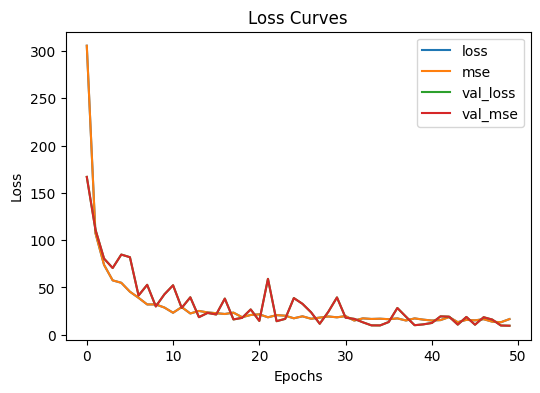

In [20]:
# Plot the loss curves
pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()


In [21]:
# Make predictions
y_pred = model.predict(X_test)
# View the first prediction
y_pred[0]

4/4 [==============================] - 0s 10ms/step


array([19.13659], dtype=float32)

In [ ]:
# Sure, let's dive deeper into each part of the code:

# Data Analysis and Visualization Libraries
# import tensorflow as tf: TensorFlow is a deep learning library that provides tools for building and training neural networks.
# import numpy as np: NumPy is used for numerical computations and array manipulations.
# import pandas as pd: Pandas is a library for data manipulation and analysis, offering data structures like DataFrames.
# import matplotlib.pyplot as plt: Matplotlib is a plotting library used for creating visualizations.
# %matplotlib inline: This magic command in Jupyter notebooks ensures that matplotlib plots are displayed inline.
# Loading Data
# tf.keras.datasets.boston_housing.load_data(...): Loads the Boston housing dataset into training and testing sets. Parameters like path, test_split, and seed are used for data loading.
# Converting Data to DataFrame
# X_train_df = pd.DataFrame(X_train): Converts the training data array (X_train) into a pandas DataFrame (X_train_df) for easier manipulation and analysis.
# y_train_df = pd.DataFrame(y_train): Converts the training target array (y_train) into a DataFrame (y_train_df).
# Preview and Summary of Data
# X_train_df.head(10): Displays the first 10 rows of the training data DataFrame.
# X_train_df.info(): Provides information about the DataFrame, including data types and missing values.
# X_train_df.describe(): Shows statistical summary (mean, min, max, quartiles) of the numerical features in the DataFrame.
# Data Preprocessing
# make_column_transformer(...): Creates a column transformer object (ct) for applying transformations to specific columns.
# ct.fit_transform(X_train): Fits the transformer to the training data (X_train) and applies transformations (MinMax scaling) to normalize the data.
# X_train.shape[1]: Gets the number of features (columns) in the transformed training data.
# train_test_split(...): Splits the normalized training data into training and validation sets (X_train, X_val, y_train, y_val) for model evaluation.
# Model Building and Compilation
# tf.keras.Sequential([...]): Defines a sequential model with multiple layers (dense layers) for building a neural network.
# model.compile(...): Compiles the model with specified loss function (mean_squared_error), optimizer (RMSprop with learning rate), and metrics (mse for mean squared error).
# Model Training
# model.fit(...): Trains the compiled model on the training data (X_train, y_train) for a specified number of epochs and batch size. The validation data (X_val, y_val) is used for model evaluation during training.
# Evaluation and Visualization
# model.evaluate(...): Evaluates the trained model on the test data (X_test, y_test) and computes the loss and mean squared error (MSE).
# pd.DataFrame(history.history).plot(...): Plots the training history (loss curves) using the training history object (history). This provides insights into model performance over epochs.
# Making Predictions
# model.predict(X_test): Generates predictions (y_pred) on the test data using the trained model. The first prediction (y_pred[0]) is displayed as an example.
# Overall, the code showcases a typical machine learning workflow, including data loading, preprocessing, model building, training, evaluation, and visualization using TensorFlow, pandas, and other libraries. It demonstrates best practices for data analysis and model development in a structured and understandable manner.

<!-- Title: Binary classification using Deep Neural Networks Example: Classify movie reviews into  positive"reviews and "negative" reviews, just based on the text content of the reviews. Use IMDB dataset 
Objective: Students should be able to Classify movie reviews into positive reviewsand  "negativereviews on IMDB Dataset. 
Outcome: Student can apply the technique of Deep Neural network for implementing classification Prerequisite: 
1. Basic of programming language 
2. Concept of Classification 
3. Concept of Deep Neural Network 
Contents forTheory: 
1. What is Classification 
2. Example of Classification 
3. How Deep Neural Network Work on Classification 
4. Code Explanation with Output 
---------------------------------------------------------------------------------------------------------------
Dr. D. Y. Patil Institute of Technology, Pimpri, Pune 
Department of Computer Engineering Course : Laboratory Practice V 
What is Classification? 
Classification is a type of supervised learning in machine learning that involves categorizing data  into predefined classes or categories based on a set of features or characteristics. It is used to predict  the classof new, unseen data based on the patterns learned from the labeled training data. In classification, a model is trained on a labeled dataset, where each data point has a known class  label. The model learns to associate the input features with the corresponding class labels and can  then be usedto classify new, unseen data. 
For example, we can use classification to identify whether an email is spam or not based on its  content and metadata, to predict whether a patient has a disease based on their medical records and  symptoms, orto classify images into different categories based on their visual features. Classification algorithms can vary in complexity, ranging from simple models such as decision trees  and k-nearest neighbors to more complex models such as support vector machines and neural  networks. The choice of algorithm depends on the nature of the data, the size of the dataset, and the  desired level of accuracy and interpretability. 
Classification is a common task in deep neural networks, where the goal is to predict the class of an input based on its features. Here's an example of how classification can be performed in a deep  neural network using the popular MNIST dataset of handwritten digits. 
The MNIST dataset contains 60,000 training images and 10,000 testing images of handwritten digits from 0 to 9. Each image is a grayscale 28x28 pixel image, and the task is to classify each image into  one of the 10 classes corresponding to the 10 digits. 
We can use a convolutional neural network (CNN) to classify the MNIST dataset. A CNN is a type  of deep neural network that is commonly used for image classification tasks. 
How Deep Neural Network Work on Classification 
Deep neural networks are commonly used for classification tasks because they can automatically  learn toextract relevant features from raw input data and map them to the correct output class.
Dr. D. Y. Patil Institute of Technology, Pimpri, Pune 
Department of Computer Engineering Course : Laboratory Practice V 
The basic architecture of a deep neural network for classification consists of three main parts: an  input layer, one or more hidden layers, and an output layer. The input layer receives the raw input  data, which is usually preprocessed to a fixed size and format. The hidden layers are composed of  neurons that apply linear transformations and nonlinear activations to the input features to extract  relevant patterns and representations. Finally, the output layer produces the predicted class labels,  usually as a probability distribution over the possible classes. 
During training, the deep neural network learns to adjust its weights and biases in each layer to  minimize the difference between the predicted output and the true labels. This is typically done by  optimizing a loss function that measures the discrepancy between the predicted and true labels, using  techniques such as gradient descent or stochastic gradient descent. 
One of the key advantages of deep neural networks for classification is their ability to learn  hierarchical representations of the input data. In a deep neural network with multiple hidden layers,  each layer learns to capture more complex and abstract features than the previous layer, by building  on the representations learned by the earlier layers. This hierarchical structure allows deep neural  networks to learn highly discriminative features that can separate different classes of input data, even  when the data is highly complex or noisy. 
Overall, the effectiveness of deep neural networks for classification depends on the choice of architecture, hyperparameters, and training procedure, as well as the quality and quantity of the  training data. When trained properly, deep neural networks can achieve state-of-the-art performance  on a wide range of classification tasks, from image recognition to natural language processing. 
IMDB Dataset-The IMDB dataset is a large collection of movie reviews collected from the IMDB website, which is a popular source of user-generated movie ratings and reviews. The dataset consists  of 50,000 movie reviews, split into 25,000 reviews for training and 25,000 reviews for testing. 
Each review is represented as a sequence of words, where each word is represented by an integer  index based on its frequency in the dataset. The labels for each review are binary, with 0 indicating a  negative review and 1 indicating a positive review. 
The IMDB dataset is commonly used as a benchmark for sentiment analysis and text classification  tasks,where the goal is to classify the movie reviews as either positive or negative based on their text  content. The dataset is challenging because the reviews are often highly subjective and can contain  complex language and nuances of meaning, making it difficult for traditional machine learning  approaches to accurately classify them.
Dr. D. Y. Patil Institute of Technology, Pimpri, Pune 
Department of Computer Engineering Course : Laboratory Practice V 
Deep learning approaches, such as deep neural networks, have achieved state-of-the-art performance  on the IMDB dataset by automatically learning to extract relevant features from the raw text data and  map them to the correct output class. The IMDB dataset is widely used in research and education for  natural language processing and machine learning, as it provides a rich source of labeled text data for  training and testing deep learning models. 
Conclusion- In this way we can Classify the Movie Reviews by using DNN. 
FAQ: 
1. What is Binary Classification? 
2. What is binaryCross Entropy? 
3. What is Validation Split? 
4. What is the Epoch Cycle? 
5. What is Adam Optimizer? -->


 <!-- Title of the Assignment: Linear regression by using Deep Neural network: Implement Boston housing
 price.prediction problem by Linear regression using Deep Neural network. Use Boston House price
 prediction dataset.
 Objective of the Assignment: Students should be able to perform Linear regression by using
 Deep Neural network on Boston House Dataset.
 Prerequisite:
 1.
 2.
 3.
 Basic of programming language
 Concept of Linear Regression
 Concept of Deep Neural Network--------------------------------------------------------------------------------------------------------------
Contents for Theory:
 1.
 2.
 3.
 4.
 5.
 What is Linear Regression
 Example of Linear Regression
 Concept of Deep Neural Network
 How Deep Neural Network Work
 Code Explanation with Output--------------------------------------------------------------------------------------------------------------
SNJB’s Late Sau. K.B. Jain College Of Engineering
What is Linear Regression?
 Linear regression is a statistical approach that is commonly used to model the relationship between a
 dependent variable and one or more independent variables. It assumes a linear relationship between the
 variables and uses mathematical methods to estimate the coefficients that best fit the data.
 Deep neural networks are a type of machine learning algorithm that are modeled after the structure and
 function of the human brain. They consist of multiple layers of interconnected neurons that process data
 and learn from it to make predictions or classifications.
 Linear regression using deep neural networks combines the principles of linear regression with the power
 of deep learning algorithms. In this approach, the input features are passed through one or more layers of
 neurons to extract features and then a linear regression model is applied to the output of the last layer to
 make predictions. The weights and biases of the neural network are adjusted during training to optimize
 the performance of the model.
 This approach can be used for a variety of tasks, including predicting numerical values, such as stock
 prices or housing prices, and classifying data into categories, such as detecting whether an image contains
 a particular object or not. It is often used in fields such as finance, healthcare, and image recognition.
 Example Of Linear Regression
 A suitable example of linear regression using deep neural network would be predicting the price of a
 house based on various features such as the size of the house, the number of bedrooms, the location, and
 the age of the house.
 In this example, the input features would be fed into a deep neural network, consisting of multiple layers
 of interconnected neurons. The first few layers of the network would learn to extract features from the
 input data, such as identifying patterns and correlations between the input features.
 The output of the last layer would then be passed through a linear regression model, which would use the
 learned features to predict the price of the house.
 During training, the weights and biases of the neural network would be adjusted to minimize the
 difference between the predicted price and the actual price of the house. This process is known as gradient
 descent, and it involves iteratively adjusting the model's parameters until the optimal values are reached.
 Once the model is trained, it can be used to predict the price of a new house based on its features. This
 approach can be used in the real estate industry to provide accurate and reliable estimates of house prices,
 which can help both buyers and sellers make informed decisions.
 Concept of Deep Neural Network
SNJB’s Late Sau. K.B. Jain College Of Engineering
A deep neural network is a type of machine learning algorithm that is modeled after the structure and
 function of the human brain. It consists of multiple layers of interconnected nodes, or artificial neurons,
 that process data and learn from it to make predictions or classifications.
 Each layer of the network performs a specific type of processing on the data, such as identifying patterns
 or correlations between features, and passes the results to the next layer. The layers closest to the input are
 known as the "input layer", while the layers closest to the output are known as the "output layer".
 The intermediate layers between the input and output layers are known as "hidden layers". These layers
 are responsible for extracting increasingly complex features from the input data, and can be deep (i.e.,
 containing many hidden layers) or shallow (i.e., containing only a few hidden layers).
 Deep neural networks are trained using a process known as backpropagation, which involves adjusting the
 weights and biases of the nodes based on the error between the predicted output and the actual output.
 This process is repeated for multiple iterations until the model reaches an optimal level of accuracy.
 Deep neural networks are used in a variety of applications, such as image and speech recognition, natural
 language processing, and recommendation systems. They are capable of learning from vast amounts of
 data and can automatically extract features from raw data, making them a powerful tool for solving
 complex problems in a wide range of domains.
 How Deep Neural Network Work
Boston House Price Prediction is a common example used to illustrate how a deep neural network can
 work for regression tasks. The goal of this task is to predict the price of a house in Boston based on
 various features such as the number of rooms, crime rate, and accessibility to public transportation.
 Here's how a deep neural network can work for Boston House Price Prediction:
 1. Data preprocessing: The first step is to preprocess the data. This involves normalizing the input
 features to have a mean of 0 and a standard deviation of 1, which helps the network learn more
 efficiently. The dataset is then split into training and testing sets.
 2. Model architecture: A deep neural network is then defined with multiple layers. The first layer is
 the input layer, which takes in the normalized features. This is followed by several hidden layers,
 which can be deep or shallow. The last layer is the output layer, which predicts the house price.
 3. Model training: The model is then trained using the training set. During training, the weights and
 biases of the nodes are adjusted based on the error between the predicted output and the actual
 output. This is done using an optimization algorithm such as stochastic gradient descent.
 4. Model evaluation: Once the model is trained, it is evaluated using the testing set. The
 SNJB’s Late Sau. K.B. Jain College Of Engineering
performance of the model is measured using metrics such as mean squared error or mean absolute
 error.
 5. Model prediction: Finally, the trained model can be used to make predictions on new data, such as
 predicting the price of a new house in Boston based on its features.
 6. By using a deep neural network for Boston House Price Prediction, we can obtain accurate
 predictions based on a large set of input features. This approach is scalable and can be used for
 other regression tasks as well.
 Boston House Price Prediction Dataset
Boston House Price Prediction is a well-known dataset in machine learning and is often used to
 demonstrate regression analysis techniques. The dataset contains information about 506 houses in Boston,
 Massachusetts, USA. The goal is to predict the median value of owner-occupied homes in thousands of
 dollars.
 The dataset includes 13 input features, which are:
 CRIM: per capita crime rate by town
 ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS: proportion of non-retail business acres per town
 CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 NOX:nitric oxides concentration (parts per 10 million)
 RM:average number of rooms per dwelling
 AGE: proportion of owner-occupied units built prior to 1940
 DIS: weighted distances to five Boston employment centers
 RAD: index of accessibility to radial highways
 TAX: full-value property-tax rate per $10,000
 PTRATIO: pupil-teacher ratio by town
 B: 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
 LSTAT: % lower status of the population
 The output variable is the median value of owner-occupied homes in thousands of dollars (MEDV).
 To predict the median value of owner-occupied homes, a regression model is trained on the dataset. The
 model can be a simple linear regression model or a more complex model, such as a deep neural network.
 After the model is trained, it can be used to predict the median value of owner-occupied homes based on
 the input features. The model's accuracy can be evaluated using metrics such as mean squared error or
 SNJB’s Late Sau. K.B. Jain College Of Engineering
mean absolute error.
 BostonHousePricePrediction isaexampleof regressionanalysisandisoftenusedtoteachmachine
 learningconcepts.Thedataset isalsousedinresearchtocomparetheperformanceofdifferentregression
 models.
 Source Code with Explanation
#Importing the pandas for data processing and numpy for numerical
 computing
 import numpy as np
 import pandas as pd
 # Importing the Boston Housing dataset from the sklearn
 from sklearn.datasets import load_boston
 boston = load_boston()
 #Converting the data into pandas dataframe
 data = pd.DataFrame(boston.data)
 #First look at the data
 data.head()
 #Adding the feature names to the dataframe
 data.columns = boston.feature_names
 #Adding the target variable to the dataset
 data['PRICE'] = boston.target
 #Looking at the data with names and target variable
 data.head(n=10)
 SNJB’s Late Sau. K.B. Jain College Of Engineering
#Shape of the data
 print(data.shape)
 #Checking the null values in the dataset
 data.isnull().sum()
 CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 PRICE      0
 dtype: int64
 #Checking the statistics of the data
 data.describe()
 # This is sometimes very useful, for example if you look at the CRIM the max is
 88.97 and 75% of the value is below 3.677083 and
 # mean is 3.613524 so it means the max values is actually an outlier or there are
 SNJB’s Late Sau. K.B. Jain College Of Engineering
outliers present in the column
 data.info()
 <class 'pandas.core.frame.DataFrame'>
 RangeIndex: 506 entries, 0 to 505
 Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype---  ------   --------------  ----
0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
 dtypes: float64(14)
 memory usage: 55.5 KB
 SNJB’s Late Sau. K.B. Jain College Of Engineering
#checking the distribution of the target variable
 import seaborn as sns
 sns.distplot(data.PRICE)
 #The distribution seems normal, has not be the data normal we would have perform
 log transformation or took to square root of the data to make the data normal.
 # Normal distribution is need for the machine learning for better predictiblity
 of the model
 #Distribution using box plot
 sns.boxplot(data.PRICE)
 #Checking the correlation of the independent feature with the dependent feature
 # Correlation is a statistical technique that can show whether and how strongly
 pairs of variables are related.An intelligent correlation analysis can lead to a
 greater understanding of your data
 #checking Correlation of the data
 correlation = data.corr()
 correlation.loc['PRICE']
 CRIM      -0.388305
 SNJB’s Late Sau. K.B. Jain College Of Engineering
ZN         0.360445
 INDUS     -0.483725
 CHAS       0.175260
 NOX       -0.427321
 RM         0.695360
 AGE       -0.376955
 DIS        0.249929
 RAD       -0.381626
 TAX       -0.468536
 PTRATIO   -0.507787
 B          0.333461
 LSTAT     -0.737663
 PRICE      1.000000
 Name: PRICE, dtype: float64
 # plotting the heatmap
 import matplotlib.pyplot as plt
 fig,axes = plt.subplots(figsize=(15,12))
 sns.heatmap(correlation,square = True,annot = True)
 # By looking at the correlation plot LSAT is negatively correlated with -0.75 and
 RM is positively correlated to the price and PTRATIO is correlated negatively
 with -0.51
 SNJB’s Late Sau. K.B. Jain College Of Engineering
# Checking the scatter plot with the most correlated features
 plt.figure(figsize = (20,5))
 features = ['LSTAT','RM','PTRATIO']
 for i, col in enumerate(features):
 plt.subplot(1, len(features) , i+1)
 x = data[col]
 y = data.PRICE
 plt.scatter(x, y, marker='o')
 plt.title("Variation in House prices")
 plt.xlabel(col)
 plt.ylabel('"House prices in $1000"')
 # Splitting the dependent feature and independent feature
 #X = data[['LSTAT','RM','PTRATIO']]
 X = data.iloc[:,:-1]
 y= data.PRICE
 # In order to provide a standardized input to our neural network, we need the
 perform the normalization of our dataset.
 # This can be seen as an step to reduce the differences in scale that may arise
 from the existent features.
 # We perform this normalization by subtracting the mean from our data and
 dividing it by the standard deviation.
 # One more time, this normalization should only be performed by using the mean
 and standard deviation from the training set,
 # in order to avoid any information leak from the test set.
 mean = X_train.mean(axis=0)
 std = X_train.std(axis=0)
 X_train = (X_train - mean) / std
 X_test = (X_test - mean) / std
 #Linear Regression
 from sklearn.linear_model import LinearRegression
 SNJB’s Late Sau. K.B. Jain College Of Engineering
regressor = LinearRegression()
 #Fitting the model
 regressor.fit(X_train,y_train)
 # Model Evaluation
 #Prediction on the test dataset
 y_pred = regressor.predict(X_test)
 # Predicting RMSE the Test set results
 from sklearn.metrics import mean_squared_error
 rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
 print(rmse)
 from sklearn.metrics import r2_score
 r2 = r2_score(y_test, y_pred)
 print(r2)
 # Neural Networks
 #Scaling the dataset
 from sklearn.preprocessing import StandardScaler
 sc = StandardScaler()
 X_train = sc.fit_transform(X_train)
 X_test = sc.transform(X_test)
 # Due to the small amount of presented data in this dataset, we must be careful
 to not create an overly complex model,
 # which could lead to overfitting our data. For this, we are going to adopt an
 architecture based on two Dense layers,
 # the first with 128 and the second with 64 neurons, both using a ReLU activation
 function.
 # A dense layer with a linear activation will be used as output layer.
 # In order to allow us to know if our model is properly learning, we will use a
 mean squared error loss function and to report the performance of it we will
 adopt the mean average error metric.
 # By using the summary method from Keras, we can see that we have a total of
 10,113 parameters, which is acceptable for us.
 #Creating the neural network model
 import keras
 from keras.layers import Dense, Activation,Dropout
 from keras.models import Sequential
 model = Sequential()
 model.add(Dense(128,activation  = 'relu',input_dim =13))
 model.add(Dense(64,activation  = 'relu'))
 SNJB’s Late Sau. K.B. Jain College Of Engineering
model.add(Dense(32,activation  = 'relu'))
 model.add(Dense(16,activation  = 'relu'))
 model.add(Dense(1))
 #model.compile(optimizer='adam', loss='mse', metrics=['mae'])
 model.compile(optimizer = 'adam',loss ='mean_squared_error',metrics=['mae'])
 !pip install ann_visualizer
 !pip install graphviz
 from ann_visualizer.visualize import ann_viz;
 #Build your model here
 ann_viz(model, title="DEMO ANN");
 history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)
 # By plotting both loss and mean average error, we can see that our model was
 capable of learning patterns in our data without overfitting taking place (as
 shown by the validation set curves)
 from plotly.subplots import make_subplots
 import plotly.graph_objects as go
 fig = go.Figure()
 fig.add_trace(go.Scattergl(y=history.history['loss'],
 name='Train'))
 fig.add_trace(go.Scattergl(y=history.history['val_loss'],
 name='Valid'))
 fig.update_layout(height=500, width=700,
 xaxis_title='Epoch',
 yaxis_title='Loss')
 fig.show()
 fig = go.Figure()
 SNJB’s Late Sau. K.B. Jain College Of Engineering
fig.add_trace(go.Scattergl(y=history.history['mae'],
 name='Train'))
 fig.add_trace(go.Scattergl(y=history.history['val_mae'],
 name='Valid'))
 fig.update_layout(height=500, width=700,
 xaxis_title='Epoch',
 yaxis_title='Mean Absolute Error')
 fig.show()
 #Evaluation of the model
 y_pred = model.predict(X_test)
 mse_nn, mae_nn = model.evaluate(X_test, y_test)
 print('Mean squared error on test data: ', mse_nn)
 print('Mean absolute error on test data: ', mae_nn)
 4/4 [==============================] - 0s 4ms/step - loss: 10.5717 - mae: 2.2670
 Mean squared error on test data:  10.571733474731445
 Mean absolute error on test data:  2.2669904232025146
 #Comparison with traditional approaches
 #First let's try with a simple algorithm, the Linear Regression:
 from sklearn.metrics import mean_absolute_error
 lr_model = LinearRegression()
 lr_model.fit(X_train, y_train)
 SNJB’s Late Sau. K.B. Jain College Of Engineering
y_pred_lr = lr_model.predict(X_test)
 mse_lr = mean_squared_error(y_test, y_pred_lr)
 mae_lr = mean_absolute_error(y_test, y_pred_lr)
 print('Mean squared error on test data: ', mse_lr)
 print('Mean absolute error on test data: ', mae_lr)
 from sklearn.metrics import r2_score
 r2 = r2_score(y_test, y_pred)
 print(r2)
 0.8812832788381159
 # Predicting RMSE the Test set results
 from sklearn.metrics import mean_squared_error
 rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
 print(rmse)
 3.320768607496587
 # Make predictions on new data
 import sklearn
 new_data = sklearn.preprocessing.StandardScaler().fit_transform(([[0.1, 10.0,
 5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]]))
 prediction = model.predict(new_data)
 print("Predicted house price:", prediction)
 1/1 [==============================] - 0s 70ms/step
 Predicted house price: [[11.104753]]
 #new_data =
 sklearn.preprocessing.StandardScaler().fit_transform(([[0.1, 10.0,
 5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]])) is a line of code
 that standardizes the input features of a new data point.
 In this specific case, we have a new data point represented as a
 list of 13 numeric values ([0.1, 10.0, 5.0, 0, 0.4, 6.0, 50, 6.0, 1,
 400, 20, 300, 10]) that represents the values for the 13 features of
 the Boston House Price dataset.
 The StandardScaler() function from the sklearn.preprocessing module
 is used to standardize the data. Standardization scales each feature
 to have zero mean and unit variance, which is a common preprocessing
 step in machine learning to ensure that all features contribute
 equally to the model.
 The fit_transform() method is used to fit the scaler to the data and
 apply the standardization transformation. The result is a new data
 SNJB’s Late Sau. K.B. Jain College Of Engineering
point with standardized feature values.
 Conclusion- In this way we can Predict the Boston House Price using Deep Neural Network.
 Assignment Question
 1. What is Linear Regression?
 2. What is a Deep Neural Network?
 3. What is the concept of standardization?
 4. Why split data into train and test?
 5. Write Down Application of Deep Neural Network -->